# Recipe Attribute Analysis

This notebook analyzes how recipe-level features affect average user ratings using machine learning models.

## 1. Data Loading & Preparation

We load both `RAW_recipes.csv` and `RAW_interactions.csv`, then merge them to get average rating per recipe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Handling

### 1. Load Datasets

In [ ]:
recipe = pd.read_csv("RAW_recipes.csv")
interactions = pd.read_csv("RAW_interactions.csv")

In [ ]:
len(recipe["id"].unique()) == len(recipe)

True

In [ ]:
avg_rating = interactions.groupby('recipe_id')["rating"].mean().reset_index()

In [ ]:
# Merge recipe data with average user ratings
recipe_all = recipe.merge(avg_rating, left_on="id", right_on="recipe_id", how="left")

In [ ]:
recipe_all.drop("recipe_id", axis=1, inplace=True)

In [ ]:
recipe_all.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,5.0


### 2. Feature Engineering

In [ ]:
import ast
recipe_all["n_tags"] = recipe_all["tags"].apply(lambda x: len(ast.literal_eval(x)))

In [ ]:
sum([51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0])

70.5

In [ ]:
# Create total nutrition feature
recipe_all["nutrition_sum"] = recipe_all["nutrition"].apply(lambda x: sum(ast.literal_eval(x)))

In [ ]:
recipe_all["submitted"]

0         2005-09-16
1         2002-06-17
2         2005-02-25
3         2003-04-14
4         2002-10-25
             ...    
231632    2012-08-29
231633    2013-01-09
231634    2008-06-07
231635    2008-04-15
231636    2008-04-15
Name: submitted, Length: 231637, dtype: object

In [ ]:
recipe_all["submitted"] = pd.to_datetime(recipe_all["submitted"])

In [ ]:
recipe_all["year"] = recipe_all["submitted"].dt.year
recipe_all["month"] = recipe_all["submitted"].dt.month
recipe_all["day"] = recipe_all["submitted"].dt.day

In [ ]:
recipe_all["total_year_from_submission"] = 2019 - recipe_all["year"]

In [ ]:

numeric_independent_columns = ["minutes", "n_steps", "n_ingredients", "n_tags", "nutrition_sum", "total_year_from_submission"]
X = recipe_all[numeric_independent_columns]
y = recipe_all["rating"]

In [ ]:
recipe_all[["minutes", "n_steps", "n_ingredients", "n_tags", "nutrition_sum", "total_year_from_submission", "rating"]].corr()

,minutes,n_steps,n_ingredients,n_tags,nutrition_sum,total_year_from_submission,rating
minutes,1.000000,-0.000257,-0.000592,-0.000824,-0.000185,-0.000423,0.000812
n_steps,-0.000257,1.000000,0.427705,-0.075640,0.060083,-0.068641,-0.027834
n_ingredients,-0.000592,0.427705,1.000000,-0.068197,0.046249,-0.041361,-0.007943
n_tags,-0.000824,-0.075640,-0.068197,1.000000,-0.022466,0.215108,0.002371
nutrition_sum,-0.000185,0.060083,0.046249,-0.022466,1.000000,0.031621,-0.020680
total_year_from_submission,-0.000423,-0.068641,-0.041361,0.215108,0.031621,1.000000,-0.009546
rating,0.000812,-0.027834,-0.007943,0.002371,-0.020680,-0.009546,1.000000


[]

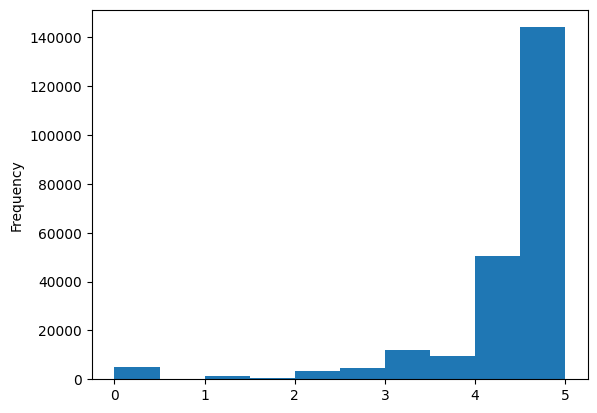

In [ ]:
y.plot(kind="hist")
plt.plot()
## highly skewed data

## Modeling & Evaluation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                      feature       VIF
0                     minutes  1.000004
1                     n_steps  4.359603
2               n_ingredients  7.250491
3                      n_tags  6.658618
4               nutrition_sum  1.120909
5  total_year_from_submission  9.697658


In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.drop("total_year_from_submission",axis=1).columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.drop("total_year_from_submission",axis=1).values, i)
                          for i in range(len(X.drop("total_year_from_submission",axis=1).columns))]

print(vif_data)

         feature       VIF
0        minutes  1.000003
1        n_steps  4.303157
2  n_ingredients  6.086623
3         n_tags  3.611267
4  nutrition_sum  1.114769


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Train machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Evaluate model performance using MSE
from sklearn.metrics import mean_squared_error

### 1. Linear Regression

In [ ]:
# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### MULTIPLE LINEAR REGRESSION WITH COEFFICIENTS ###
linear_mse_scores = []
linear_coefficients_list = []

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train model
# Train machine learning model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and compute RMSE
    y_pred = model.predict(X_test)
# Evaluate model performance using MSE
    mse = mean_squared_error(y_test, y_pred)
    linear_mse_scores.append(mse)

    # Store coefficients
    linear_coefficients_list.append(model.coef_)

# Compute average RMSE and coefficients
linear_mse_avg = np.mean(linear_mse_scores)
linear_coefficients_avg = np.mean(linear_coefficients_list, axis=0)

# Create DataFrame for coefficients
linear_results = pd.DataFrame({
    "Feature": [f"X{i}" for i in range(1, X_scaled.shape[1] + 1)],
    "Avg Coefficient": linear_coefficients_avg
})

### POLYNOMIAL REGRESSION (Degree=2) ###
poly_degree = 2
poly_mse_scores = []

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Transform features for polynomial regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
# Train machine learning model
    poly_model = LinearRegression().fit(X_train_poly, y_train)

    # Predict and compute RMSE
    y_pred = poly_model.predict(X_test_poly)
# Evaluate model performance using MSE
    mse = mean_squared_error(y_test, y_pred)
    poly_mse_scores.append(mse)

# Compute average RMSE score across folds
poly_mse_avg = np.mean(poly_mse_scores)

# Create DataFrame for RMSE scores
model_comparison = pd.DataFrame({
    "Model": ["Multi Linear Regression", f"Polynomial Regression (Degree {poly_degree})"],
    "Avg RMSE (10-Fold CV)": [linear_mse_avg, poly_mse_avg]
})

# Display results
print("=== Linear Regression Coefficients (Averaged Over 10 Folds) ===")
print(linear_results)

print("\n=== Model Comparison (RMSE with 10-Fold CV) ===")
print(model_comparison)

=== Linear Regression Coefficients (Averaged Over 10 Folds) ===
  Feature  Avg Coefficient
0      X1        -1.125977
1      X2        -0.029203
2      X3         0.005229
3      X4         0.002459
4      X5        -0.019626
5      X6        -0.011154

=== Model Comparison (RMSE with 10-Fold CV) ===
                              Model  Avg RMSE (10-Fold CV)
0           Multi Linear Regression           1.279412e+02
1  Polynomial Regression (Degree 2)           1.184506e+10


### 2. GLM

In [ ]:
# Generalized linear regression model
import statsmodels.api as sm
from statsmodels.genmod.families import Binomial

# Standarize y to constrain of the range [0,5]
y_transformed = y / 5  # Scale to 0〜1

# GLM + Logistic Reg
glm_model = sm.GLM(y_transformed, sm.add_constant(X_scaled), family=sm.families.Binomial())
glm_results = glm_model.fit()

# Take back to 0~5 for predicted values
y_pred = glm_results.predict(sm.add_constant(X_scaled)) * 5

# Evaluate model performance using MSE
glm_mse_avg = mean_squared_error(y, y_pred)

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:               231637
Model:                            GLM   Df Residuals:                   231630
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72945.
Date:                Sat, 15 Mar 2025   Deviance:                       70485.
Time:                        22:25:03   Pearson chi2:                 7.99e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0004478
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8956      0.006    307.241      0.0

In [ ]:
import statsmodels.api as sm

# Introduce quantile regression
quantile_model = sm.QuantReg(y, sm.add_constant(X_scaled)).fit(q=0.5)

# Prediction
y_pred = np.clip(quantile_model.predict(sm.add_constant(X_scaled)), 0, 5)

# Calculate MSE
# Evaluate model performance using MSE
quantile_mse = mean_squared_error(y, y_pred)

print(quantile_model.summary())
print(f"Quantile Regression MSE: {quantile_mse:.4f}")

                         QuantReg Regression Results                          
Dep. Variable:                 rating   Pseudo R-squared:              0.01561
Model:                       QuantReg   Bandwidth:                     0.05481
Method:                 Least Squares   Sparsity:                        1.747
Date:                Sat, 15 Mar 2025   No. Observations:               231637
Time:                        22:25:04   Df Residuals:                   231630
                                        Df Model:                            6
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7353      0.002   2609.465      0.000       4.732       4.739
x1         -7.233e-05      0.002     -0.040      0.968      -0.004       0.003
x2             0.0028      0.002      1.384      0.166      -0.001       0.007
x3            -0.0131      0.002     -6.516      0.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Split data into training and test sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_scaled.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="mse", optimizer="adam")

model.fit(X_train, y_train/5, epochs=100, batch_size=10, verbose=0)

y_pred = model.predict(X_test).flatten() * 5
y_pred = np.clip(y_pred, 0, 5)

# Evaluate model performance using MSE
mlp_mse = mean_squared_error(y_test, y_pred)
print(f"MLP Regression MSE: {mlp_mse:.4f}")

/Users/moritakento/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1448/1448 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
MLP Regression MSE: 0.9766


### 3. Random Forest Regressor

In [ ]:
# Train machine learning model
from sklearn.ensemble import RandomForestRegressor

# Train machine learning model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled,y)

y_pred = np.clip(rf_model.predict(X_scaled),0,5)

# Evaluate model performance using MSE
rf_mse = mean_squared_error(y, y_pred)
print(f"Random Forest MSE: {rf_mse:.4f}")

Random Forest MSE: 0.1454


In [ ]:
feature_importances = rf_model.feature_importances_

feature_importances_df = pd.DataFrame({
    "Feature": [f"{numeric_independent_columns[i]}" for i in range(X_scaled.shape[1])],
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("\n=== Feature Importances (Sorted) ===")
print(feature_importances_df)


=== Feature Importances (Sorted) ===
                      Feature  Importance
4               nutrition_sum    0.361614
3                      n_tags    0.159167
1                     n_steps    0.134766
0                     minutes    0.125421
2               n_ingredients    0.119985
5  total_year_from_submission    0.099047


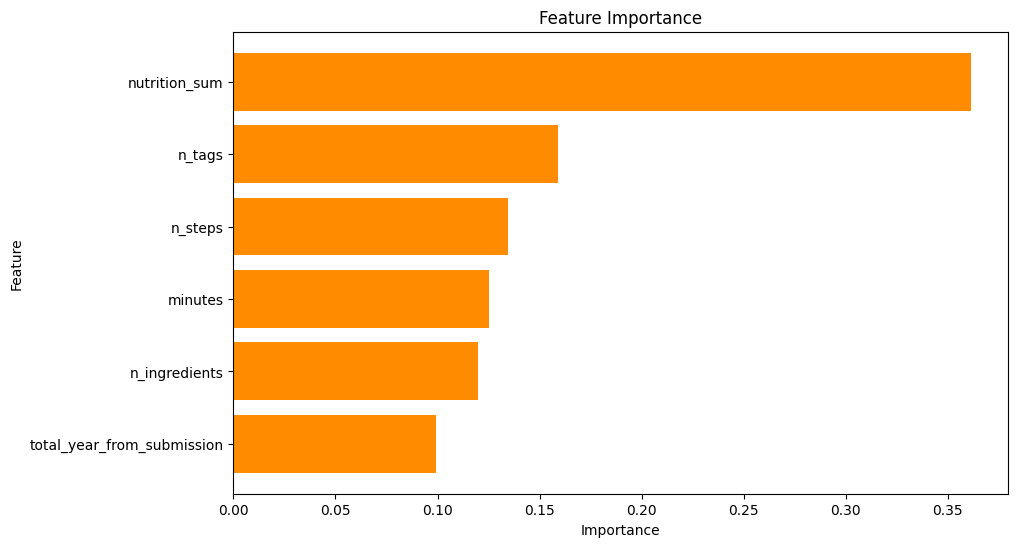

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df["Feature"], feature_importances_df["Importance"], color='darkorange')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)


results = pd.DataFrame({
    "Model": ["Linear Regression", "GLM (Beta)", "MLP (Neural Network)", "Random Forest"],
    "Avg MSE (10-Fold CV)": [linear_mse_avg, glm_mse_avg, mlp_mse, rf_mse]
})

print(results)

                  Model  Avg MSE (10-Fold CV)
0     Linear Regression            127.941242
1            GLM (Beta)              0.980391
2  MLP (Neural Network)              0.976629
3         Random Forest              0.145434
